In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt','r').read().splitlines()
print(words[:5])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia']
32033


In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars) }
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
# build the dataset
block_size = 3 # context length, number of characters taken to predict the next character

def build_dataset(words):
    X,Y = [], []
    for w in words:
        context =[0]*block_size
        chars = w + '.'
        for ch in chars:
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:]+[ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

In [5]:
X,Y  =build_dataset(words)
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [7]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

# creating embeddings for a single number

In [8]:
embedding_dim = 2
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding
C # randomly initialized

tensor([[ 0.0879,  1.2771],
        [-0.5966, -1.1305],
        [ 0.8246,  0.7665],
        [ 2.2001,  1.1527],
        [-0.3544,  0.3202],
        [ 1.1859,  0.8914],
        [ 0.3640, -0.3128],
        [ 1.1458, -0.1729],
        [-0.2434, -0.4305],
        [-1.2239,  0.9029],
        [-1.1380, -0.8477],
        [ 0.1327,  0.3584],
        [-1.2684, -0.7974],
        [-0.1992, -0.5480],
        [ 0.9007, -0.0407],
        [-0.6728, -0.0047],
        [-1.0202,  0.4989],
        [ 1.0256, -0.7559],
        [ 0.3774,  0.2505],
        [ 0.2128,  0.6270],
        [ 0.5374, -0.4209],
        [-0.8051, -1.6438],
        [ 0.0243,  1.2121],
        [ 0.2960,  1.8570],
        [ 1.1130,  0.8876],
        [-0.7172,  0.0273],
        [ 0.5112, -0.6853]])

In [9]:
C.shape

torch.Size([27, 2])

In [10]:
# ways to get embeddings for a index
example_idx=5
print(C[example_idx]) # simply indexing the embeddings array (simpler so we'll use this further)
print(F.one_hot(torch.tensor(example_idx),num_classes=27).float() @ C) # converting to one hot and multiplying with C

tensor([1.1859, 0.8914])
tensor([1.1859, 0.8914])


In [11]:
# for a list we can also do
C[[1,2,3]] # getting the 1,2,3rd rows from C

tensor([[-0.5966, -1.1305],
        [ 0.8246,  0.7665],
        [ 2.2001,  1.1527]])

In [12]:
# for a 1 D tensor we can also do
C[torch.tensor([5,6,7,7,7])]
# we can also do the same for N D tensor

tensor([[ 1.1859,  0.8914],
        [ 0.3640, -0.3128],
        [ 1.1458, -0.1729],
        [ 1.1458, -0.1729],
        [ 1.1458, -0.1729]])

In [13]:
X.shape, X.dtype, Y.shape, Y.dtype,C.shape

(torch.Size([228146, 3]),
 torch.int64,
 torch.Size([228146]),
 torch.int64,
 torch.Size([27, 2]))

In [14]:
# indexing all the X.shape integers simultaneiusly
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

$$y=x^2$$

In a neural network, each neuron in a hidden layer with \(N\) input dimensions will have \(N\) weights, one for each input dimension, and a single bias term. Here’s a detailed explanation:

1. **Weights:** Each neuron receives inputs from all \(N\) dimensions of the input vector. Therefore, it has a weight associated with each input dimension. If the input vector is \(X = [x_1, x_2, \ldots, x_N]\), the weights can be represented as \(W = [w_1, w_2, \ldots, w_N]\).

2. **Bias:** In addition to the \(N\) weights, each neuron has one bias term, denoted as \(b\).

The output of a single neuron \(y\) can be computed as:

$$
y = \sigma\left(\sum_{i=1}^{N} w_i x_i + b\right)
$$

where \(\sigma\) is the activation function (e.g., sigmoid, ReLU, etc.).

To summarize, a single neuron in a hidden layer with \(N\) input dimensions has:
- \(N\) weights, each corresponding to an input dimension.
- 1 bias term.

So, in your example, if the input is \(N\)-dimensional, the neuron does not have a single value for the weight or bias; it has \(N\) weights and one bias term.

In [15]:
# constructing the hidden layer
n_neurons = 100 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
W1 = torch.randn((num_inputs,n_neurons))
b1 = torch.randn(n_neurons)
W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [16]:
emb.shape

torch.Size([228146, 3, 2])

In [17]:
# this wont work because the W emb has stacked up the examples
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [18]:
# therefore we need to concat the emb 
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape # concatenating along the 1 dim not 0
# but this is not scalable when we have a large block size as we will have to sepecify seperately for 0,1,2,3,4... 

torch.Size([228146, 6])

In [19]:
# so we use torch.unbind
torch.cat(torch.unbind(emb,1),1).shape # .cat is not efficient as it creates new memory

torch.Size([228146, 6])

In [20]:
# a much more efficient approach is to use .view function in pytorch
emb.view(228146,6)

tensor([[ 0.0879,  1.2771,  0.0879,  1.2771,  0.0879,  1.2771],
        [ 0.0879,  1.2771,  0.0879,  1.2771,  1.1859,  0.8914],
        [ 0.0879,  1.2771,  1.1859,  0.8914, -0.1992, -0.5480],
        ...,
        [ 0.5112, -0.6853,  0.5112, -0.6853, -0.7172,  0.0273],
        [ 0.5112, -0.6853, -0.7172,  0.0273,  0.5112, -0.6853],
        [-0.7172,  0.0273,  0.5112, -0.6853,  1.1130,  0.8876]])

In [21]:
# so we can do the following to get the hidden states
h = emb.view(emb.shape[0],num_inputs) @ W1 + b1
h.shape

torch.Size([228146, 100])

In [22]:
#this is also possible 
# so we can do the following to get the hidden states
h = emb.view(-1,num_inputs) @ W1 + b1 # -1, means pytorch will infer the value required as product should be same
h.shape

torch.Size([228146, 100])

In [23]:
h

tensor([[-2.1477,  1.7369,  3.1131,  ..., -4.2107, -0.6919, -1.9448],
        [-2.0322,  0.5100,  2.4993,  ..., -3.6945,  0.5100, -1.7193],
        [ 0.9034, -1.4420,  1.1100,  ..., -1.9784,  4.5905, -1.6468],
        ...,
        [ 0.1782, -1.7082,  0.7158,  ...,  0.3871,  1.6409,  0.1254],
        [-0.8625, -0.5642,  1.8807,  ...,  1.5240,  2.5728,  0.8628],
        [-2.2653, -2.4600, -0.8515,  ..., -1.7315, -0.4377, -0.5761]])

### applying activation

In [24]:
# so we can do the following to get the hidden states
h = torch.tanh(emb.view(emb.shape[0],num_inputs) @ W1 + b1)
print(h.shape)
h

torch.Size([228146, 100])


tensor([[-0.9731,  0.9399,  0.9961,  ..., -0.9996, -0.5992, -0.9599],
        [-0.9662,  0.4700,  0.9866,  ..., -0.9988,  0.4699, -0.9378],
        [ 0.7180, -0.8941,  0.8041,  ..., -0.9625,  0.9998, -0.9284],
        ...,
        [ 0.1763, -0.9364,  0.6143,  ...,  0.3688,  0.9276,  0.1248],
        [-0.6975, -0.5111,  0.9546,  ...,  0.9094,  0.9884,  0.6977],
        [-0.9787, -0.9855, -0.6919,  ..., -0.9392, -0.4117, -0.5198]])

### create another layer, final layer

In [25]:
# inputs will be the output of prev layer
num_inputs_second_layer = h.shape[1] # inputs for 2nd layer
num_outputs = 27 # for each char, total we have 27 neurons
W2 = torch.randn((num_inputs_second_layer,num_outputs ))
b2 = torch.randn(num_outputs)


In [26]:
h.shape,W2.shape, b2.shape

(torch.Size([228146, 100]), torch.Size([100, 27]), torch.Size([27]))

In [27]:
logits = h@W2+b2 # we dont need to do .view here as dims are proper
logits.shape

torch.Size([228146, 27])

In [28]:
logits

tensor([[-16.1397,  -3.5328, -13.2052,  ...,   1.4804,  -1.6016,  -0.9418],
        [-18.4959, -11.6135,  -9.0876,  ...,   5.7273,  -2.8977,  -0.3407],
        [ -8.3849,  -9.4773,  -1.8063,  ...,  -1.1070,  11.2693,  -4.6804],
        ...,
        [  2.7812,  -3.1714,  -4.7464,  ...,   0.4615,  16.5299,  -0.8866],
        [  3.5866,  -2.4891, -10.9933,  ...,   2.2986,  -1.6665,   5.8310],
        [-13.5892, -16.2394,   1.8074,  ...,   2.9279,  16.1200,   3.5841]])

In [29]:
# applying softmax
counts = logits.exp()
counts

tensor([[9.7858e-08, 2.9224e-02, 1.8410e-06,  ..., 4.3947e+00, 2.0157e-01,
         3.8993e-01],
        [9.2756e-09, 9.0429e-06, 1.1306e-04,  ..., 3.0712e+02, 5.5150e-02,
         7.1125e-01],
        [2.2828e-04, 7.6573e-05, 1.6426e-01,  ..., 3.3056e-01, 7.8378e+04,
         9.2752e-03],
        ...,
        [1.6138e+01, 4.1943e-02, 8.6829e-03,  ..., 1.5864e+00, 1.5096e+07,
         4.1205e-01],
        [3.6111e+01, 8.2985e-02, 1.6814e-05,  ..., 9.9600e+00, 1.8891e-01,
         3.4070e+02],
        [1.2539e-06, 8.8578e-08, 6.0946e+00,  ..., 1.8688e+01, 1.0019e+07,
         3.6020e+01]])

In [50]:
# applying softmax
prob = counts/counts.sum(1,keepdim=True)
print(prob.shape, prob[8].sum())

torch.Size([228146, 27]) tensor(1.0000)


In [51]:
prob

tensor([[8.5398e-18, 2.5503e-12, 1.6066e-16,  ..., 3.8352e-10, 1.7590e-11,
         3.4028e-11],
        [4.0765e-15, 3.9742e-12, 4.9689e-11,  ..., 1.3498e-04, 2.4238e-08,
         3.1258e-07],
        [9.2314e-10, 3.0966e-10, 6.6425e-07,  ..., 1.3368e-06, 3.1695e-01,
         3.7508e-08],
        ...,
        [6.4211e-07, 1.6689e-09, 3.4548e-10,  ..., 6.3120e-08, 6.0063e-01,
         1.6395e-08],
        [1.3835e-05, 3.1794e-08, 6.4418e-12,  ..., 3.8160e-06, 7.2378e-08,
         1.3053e-04],
        [3.5661e-14, 2.5191e-15, 1.7333e-07,  ..., 5.3148e-07, 2.8493e-01,
         1.0244e-06]])

In [32]:
# actual letter that comes next for a particular block sized context 
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
# we now want to index into the rows of probs and in each row, pluck out the probability assigned the correct character
# ideally all these values should be 1 because perfect model should be able to predict the correct character only

In [52]:
prob.shape, Y.shape

(torch.Size([228146, 27]), torch.Size([228146]))

In [54]:
prob[torch.arange(32),Y[0:32]] # gives the value of the index in Y for each of the 32 rows in prob,
# these are the probabilites that the model predicted for the correct chars
# we can see they are far from 1 but till now we haven't trained the model so its fine

tensor([7.4206e-09, 3.3310e-07, 1.4256e-04, 1.1065e-08, 6.6315e-09, 7.3867e-11,
        1.5889e-09, 6.4262e-06, 6.8024e-06, 2.5343e-09, 2.6764e-09, 1.9808e-03,
        2.5503e-12, 2.6238e-08, 7.4433e-07, 1.7749e-08, 2.1477e-17, 2.4711e-08,
        6.5927e-06, 4.8386e-05, 9.2484e-01, 3.4686e-14, 2.2333e-04, 9.9116e-06,
        8.1238e-10, 3.3379e-05, 2.9594e-11, 3.5303e-04, 3.4319e-04, 1.8143e-09,
        2.1599e-03, 1.5868e-08])

### negative log likelihood - loss function

In [64]:
loss = -prob[torch.arange(X.shape[0]),Y].log().mean()
loss

tensor(18.0129)

In [65]:
# we can also use F.cross_entropy from torch, this has several benefits over doing our own implementation(commented code below)
#counts = logits.exp()
#prob = counts/counts.sum(1,keepdim=True)
#loss = -prob[torch.arange(32),Y[0:32]].log().mean()

# reasons to use F.cross_entropy :
# we dont have to do all calculations/steps sequentially, steps when combined may simplify due to simplified math expressions
# it runs in a fused kernels which is optimal
# because of this the forward and the backward pass can be much more efficient
# can be more numerically well behaved, handling exp values that can become inf->nan because of large inputs

F.cross_entropy(logits,Y)

tensor(18.0129)

In [67]:
# example of 
# can be more numerically well behaved, handling exp values that can become inf->nan because of large inputs
# this happens because exp(large number) can run out of range of our floating point numbers, -ve nums are fine but +ve may cause issues
logits = torch.tensor([-100,-3,0,100])
counts = logits.exp()
print(counts)
probs = counts/counts.sum()
probs

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])


tensor([0., 0., 0., nan])

In [74]:
# how pytorch internally handles this
# note here we calculate the max value in the tensor and offset the logits by that value
# we can do this because offsetting by any arbitrary constant value wont change the probs
offset = max(logits)
logits = torch.tensor([-5,-3,0,5]) - offset
counts = logits.exp()
print(counts)
probs = counts/counts.sum()
probs

tensor([1.3534e-01, 1.0000e+00, 2.0086e+01, 2.9810e+03])


tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

## putting things together

In [96]:
embedding_dim = 2
n_neurons = 100 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
num_outputs = 27 # for each char, total we have 27 neurons
lr = 0.1 # learning rate
n_epochs =10

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding

W1 = torch.randn((num_inputs,n_neurons), generator=g)
b1 = torch.randn(n_neurons, generator=g)


# inputs will be the output of prev layer
W2 = torch.randn((n_neurons,num_outputs ), generator=g)
b2 = torch.randn(num_outputs, generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total


3481

In [97]:
for p in parameters:
    p.requires_grad=True

In [98]:

for _ in range(n_epochs):
    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1,num_inputs) @ W1 +b1)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits,Y)
    print(f"loss after epoch{_}: {loss.item()}")

    # backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update the parameters
    for p in parameters:
        p.data +=  -lr * p.grad
    
    


loss after epoch0: 17.38619041442871
loss after epoch1: 14.056153297424316
loss after epoch2: 12.852312088012695
loss after epoch3: 12.052742958068848
loss after epoch4: 11.379619598388672
loss after epoch5: 10.802681922912598
loss after epoch6: 10.27330207824707
loss after epoch7: 9.785455703735352
loss after epoch8: 9.341601371765137
loss after epoch9: 8.944975852966309


In [100]:
# notice that it take quite a bit of time for every single iteration(epoch)
# this is because we are using all the training examples together

# in practice for forward,backward and update
# we use records in form of randomly selected mini batches

mini_batch_size= 32 
torch.randint(0,X.shape[0], (mini_batch_size,))

tensor([ 25099,  22668, 169302, 143047,  51624,   1792,    966,  15437,  37418,
        167721, 153993,  72952, 209305,  15921, 195498,  46490,  95236, 128437,
        153693,  49236, 218002, 143686, 197615,  30719, 162337,  63733,   3394,
         52600,  16140, 184642,  47220, 125941])

# using minibatch

In [125]:
embedding_dim = 2
n_neurons = 100 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
num_outputs = 27 # for each char, total we have 27 neurons
lr = 0.1 # learning rate
n_epochs =1000 # using more iterations as we have mini batches and they are fast
mini_batch_size= 32 

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding

W1 = torch.randn((num_inputs,n_neurons), generator=g)
b1 = torch.randn(n_neurons, generator=g)


# inputs will be the output of prev layer
W2 = torch.randn((n_neurons,num_outputs ), generator=g)
b2 = torch.randn(num_outputs, generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
    p.requires_grad=True

In [114]:
for _ in range(n_epochs):
    #minibatch construct
    ix =torch.randint(0,X.shape[0],(mini_batch_size,))
    # forward pass using minibatched examples
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,num_inputs) @ W1 +b1)
    logits = h @ W2 +b2

    # loss for minibatched examples
    loss = F.cross_entropy(logits,Y[ix]) 
    if  _ %100 == 0:
        print(f"loss 'for mini batch' after epoch {_}: {loss.item()}")
        

    # backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update the parameters
    for p in parameters:
        p.data +=  -lr * p.grad
    

# this worked much faster
# but we didn't use the all records, only at max n_epochs x  mini_batch_size

# because of this we don't have the best gradients (since not all data is used)- we are using approximate gradients
# but even these approximate gradients are also good enough
# because now since its faster, we can increase the number of steps by large amount
# and its better to have approximate gradients but use more steps for optimization
# than to have good gradients but use very less steps for optimization

loss 'for mini batch' after epoch 0: 19.564191818237305
loss 'for mini batch' after epoch 100: 3.0173513889312744
loss 'for mini batch' after epoch 200: 3.153050661087036
loss 'for mini batch' after epoch 300: 3.2578980922698975
loss 'for mini batch' after epoch 400: 3.0900368690490723
loss 'for mini batch' after epoch 500: 3.249661445617676
loss 'for mini batch' after epoch 600: 2.531350612640381
loss 'for mini batch' after epoch 700: 2.511445999145508
loss 'for mini batch' after epoch 800: 2.7576327323913574
loss 'for mini batch' after epoch 900: 2.6781437397003174


In [115]:
# loss on whole data
emb = C[X]
h = torch.tanh(emb.view(-1,num_inputs) @ W1 +b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits,Y) 
loss

tensor(2.6237, grad_fn=<NllLossBackward0>)

## Finding a good initial learning rate to use

In [126]:
# candidate learning rates
lre = torch.linspace(-3, 0, 1000) # -3, 0 can be guessed by running some radom values and seeing whether the learning rate is extreme(not learning anything on super low, unstable loss of super high)
lrs = 10**lre # we are spaced exponentially between 10^-3 and 1
print(len(lre), len(lrs))
lrs[0:10] # we are creating some values between 10^-3 and 1

1000 1000


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [127]:
# then we track the loss for each candidate learning rate
lri = []
lossi = []
#stepi = []

In [128]:
# we run for some relatively small number of steps
for i in range(1000):
  
  # minibatch construct
  ix =torch.randint(0,X.shape[0],(mini_batch_size,))
  
  # forward pass
  emb = C[X[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, num_inputs) @ W1 + b1) 
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = lrs[i]
  #lr = 0.1 if i < 100000 else 0.01 # this is for decaying learning rate
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lre[i]) # logging the exponent of lr
  #stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

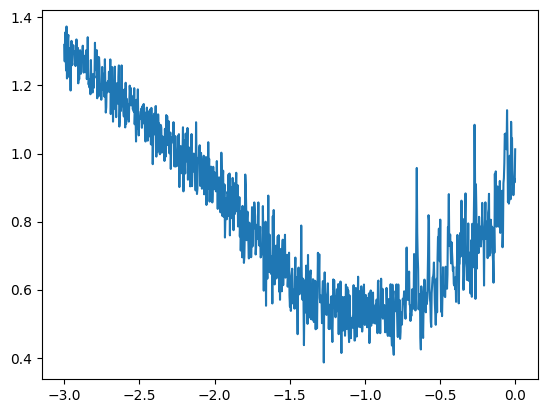

In [129]:
plt.plot(lri, lossi)


In [ ]:
# Notes- 
# 1. we want to use the learning rate somewhere in the valley of the above graph

#2. as the parameters or model increases, the model is more likely to overfit as it increases the learning capacity of the network (on training data)
# increasing more and more will mean the model is just memorizing our training data
# but when we try to sample from the model, we will only get examples as present in the training set (loss on external data will be high)

# in practice we use 3 splits-> training,dev/validation split , and test split
# typically divided like 80%,10%,10% for each of these

#1. training -> used to train the model parameters
#2. dev/val --> used to train the hyperparameters
#3. test -> used to evaluate the performace of the model at the end

# we are only evaluating loss on the test set very sparingly and very few times coz we risk the model learning on that if we do

### using train/validataion/test splits

In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [12]:
embedding_dim = 2
n_neurons = 100 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
num_outputs = 27 # for each char, total we have 27 neurons
mini_batch_size = 32
lr = 0.1 # learning rate
n_epochs =10

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding

W1 = torch.randn((num_inputs,n_neurons), generator=g)
b1 = torch.randn(n_neurons, generator=g)


# inputs will be the output of prev layer
W2 = torch.randn((n_neurons,num_outputs ), generator=g)
b2 = torch.randn(num_outputs, generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
    p.requires_grad=True

In [13]:
# candidate learning rates
lre = torch.linspace(-3, 0, 1000) # -3, 0 can be guessed by running some radom values and seeing whether the learning rate is extreme(not learning anything on super low, unstable loss of super high)
lrs = 10**lre # we are spaced exponentially between 10^-3 and 1
print(len(lre), len(lrs))
lrs[0:10] # we are creating some values between 10^-3 and 1

1000 1000


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [14]:
# then we track the loss for each candidate learning rate
lri = []
lossi = []
#stepi = []

In [22]:
# we run for some relatively small number of steps
for i in range(10000):
  
  # minibatch construct
  ix =torch.randint(0,Xtr.shape[0],(mini_batch_size,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, num_inputs) @ W1 + b1) 
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 5000 else 0.01 # this is for decaying learning rate
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i]) # logging the exponent of lr
  #stepi.append(i)
  #lossi.append(loss.log10().item())

#print(loss.item())

In [25]:
# training loss
emb = C[Xtr]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3714, grad_fn=<NllLossBackward0>)

In [26]:
# validation loss
emb = C[Xdev]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3657, grad_fn=<NllLossBackward0>)

In [ ]:
# training and dev loss both are similar so we are not overfitting, 
# but this could mean either the model is good(generalizing well) or
# we are undefitting right now as train and dev loss are fairly similar (usually train loss will be slightly higher in a good model as well)
# actions we can take are: 
   # this means that our network is too small and we may want to add more parameters/layers
   # we should have some idea about the expected values of loss for our task(this is difficult to know, can be found using bechmark datasets, literatire review etc
#    so usually we can try a bigger model and see if the train and val loss decreases further (to a point it doesn't start overfitting ))



## tackling underfitting - by using a bigger model

In [42]:
embedding_dim = 2
n_neurons = 300 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
num_outputs = 27 # for each char, total we have 27 neurons
mini_batch_size = 32
lr = 0.1 # learning rate
n_epochs =10

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding

W1 = torch.randn((num_inputs,n_neurons), generator=g)
b1 = torch.randn(n_neurons, generator=g)


# inputs will be the output of prev layer
W2 = torch.randn((n_neurons,num_outputs ), generator=g)
b2 = torch.randn(num_outputs, generator=g)
parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters)) # number of parameters in total

for p in parameters:
    p.requires_grad=True

10281


In [43]:
# candidate learning rates
lre = torch.linspace(-3, 0, 1000) # -3, 0 can be guessed by running some radom values and seeing whether the learning rate is extreme(not learning anything on super low, unstable loss of super high)
lrs = 10**lre # we are spaced exponentially between 10^-3 and 1
print(len(lre), len(lrs))
lrs[0:10] # we are creating some values between 10^-3 and 1

1000 1000


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [44]:
# then we track the loss for each candidate learning rate
lri = []
lossi = []
stepi = []

In [53]:
# we run for some relatively small number of steps
for i in range(300000):
  
  # minibatch construct
  ix =torch.randint(0,Xtr.shape[0],(mini_batch_size,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, num_inputs) @ W1 + b1) 
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 50000 else 0.0 # this is for decaying learning rate
  #lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i]) # logging the exponent of lr
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

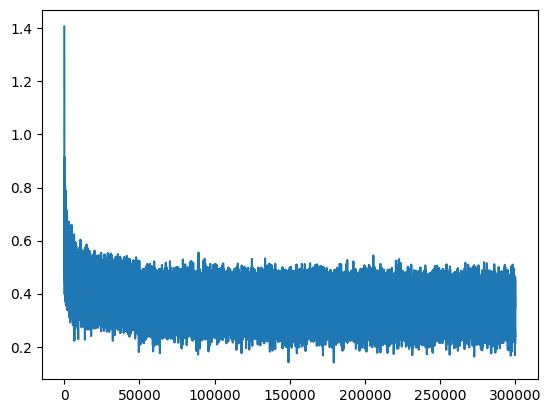

In [46]:
plt.plot(stepi,lossi)

In [ ]:
# the flickers in the above plot are caused because we are using mini batches, and the mini batches produce some noise because of which this happens
# since we increased the model size, it might need more iterations for training 
# we may also want to increase the batch size a little bit so we can decrease some noise (instead of trashing too much, reach more swiftly towards the minima)
# another problem could be that we are only using 2 D embeddings and thats cramming to many words into this 2d space, abd the NN is not able to use the space effectively causing a bottleneck in the performance
# so we may want to increase the dimensions of the embeddings as well

In [54]:
# training loss
emb = C[Xtr]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1620, grad_fn=<NllLossBackward0>)

In [55]:
# validation loss
emb = C[Xdev]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1862, grad_fn=<NllLossBackward0>)

### visualize the embedding space - if we increase more than 2d we won't be able to visualize them properly

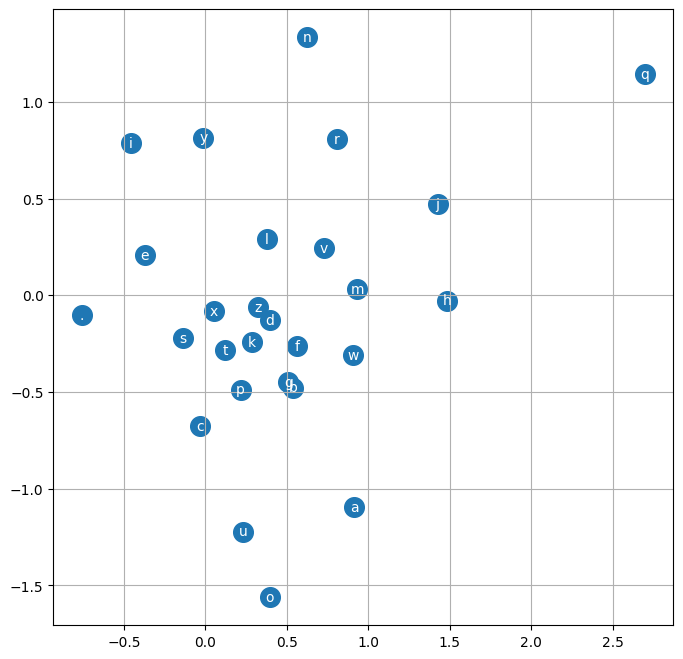

In [56]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(), itos[i],ha='center',va='center',color='white')
plt.grid('minor')

## increasing the dimensions for embeddings 

In [58]:
embedding_dim = 10
n_neurons = 300 # hyperparameter
num_inputs = block_size * embedding_dim # 3 words with 2 dims each
num_outputs = 27 # for each char, total we have 27 neurons
mini_batch_size = 32
lr = 0.1 # learning rate
n_epochs =10

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,embedding_dim)) # for each character(total 27 unique possible chars) we have a 2D embedding

W1 = torch.randn((num_inputs,n_neurons), generator=g)
b1 = torch.randn(n_neurons, generator=g)


# inputs will be the output of prev layer
W2 = torch.randn((n_neurons,num_outputs ), generator=g)
b2 = torch.randn(num_outputs, generator=g)
parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters)) # number of parameters in total

for p in parameters:
    p.requires_grad=True

17697


In [59]:
# then we track the loss for each candidate learning rate
lri = []
lossi = []
stepi = []

In [64]:
# we run for some relatively small number of steps
for i in range(100000):
  
  # minibatch construct
  ix =torch.randint(0,Xtr.shape[0],(mini_batch_size,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, num_inputs) @ W1 + b1) 
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 50000 else 0.01 # this is for decaying learning rate
  #lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i]) # logging the exponent of lr
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

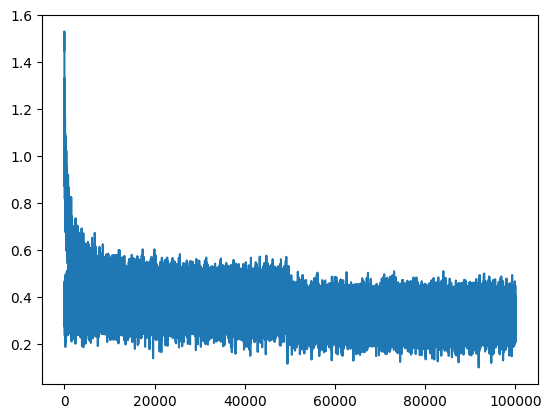

In [65]:
plt.plot(stepi,lossi)

In [66]:
# training loss
emb = C[Xtr]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1086, grad_fn=<NllLossBackward0>)

In [67]:
# validation loss
emb = C[Xdev]
h= torch.tanh(emb.view(-1,num_inputs) @W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1561, grad_fn=<NllLossBackward0>)

### sampling from the model


In [77]:
g = torch.Generator().manual_seed(42 + 10)
for _ in range(20):
    out =[]
    context = [0]*block_size # initialize with all ...
    while True:
        es = C[torch.tensor([context])]
        hs = torch.tanh(es.view(1,-1) @ W1 + b1)
        logits = hs @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs, num_samples=1,generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

ellanick.
ciya.
huleenid.
blifry.
maranzo.
yudahillisli.
didille.
zayamir.
pory.
ruzela.
dhewnadenna.
joon.
emmiddy.
thyna.
zachlyey.
tilon.
hhlanne.
shawna.
ayn.
izeelo.
